https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
def model_handler_train(model , X_train , y_train):
  model = model.fit(X_train , y_train)
  prediction = model.predict(X_train)
  meanAbErr = metrics.mean_absolute_error(y_train, prediction)
  meanSqErr = metrics.mean_squared_error(y_train, prediction)
  rootMeanSqErr = np.sqrt(meanSqErr)
  print('R squared: {:.2f}'.format(model.score(X_train,y_train)*100))
  print('Mean Absolute Error:', meanAbErr)
  print('Mean Square Error:', meanSqErr)
  print('Root Mean Square Error:', rootMeanSqErr)
  return model,prediction

In [2]:
# defining the function for filling outliers with mean value

def mean_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() > 0:
      df[ele] = df[ele].fillna(df[ele].mean())
  return df

In [3]:
# defining function for object type column for filling value with mode

def obj_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() > 0:
      df[ele] = df[ele].fillna(df[ele].mode()[0])
  return df

In [4]:
# defining the function for filling median values before handling the outliers

def median_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() > 0:
      df[ele] = df[ele].fillna(df[ele].median())
  return df

In [5]:
# defining function for NA's columns , If column has NA's more than 30 percent. columns should be dropped

def NA_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() / df.shape[0] * 100 >= 30:
      df.drop(ele, axis = 1 , inplace = True)
  return df

In [6]:
# defining function for NA's columns, which have NA's greater 0 and less than 30 percent

def NA_col(df):
  col = []
  for ele in df.columns:
    if ((df[ele].isna().sum() / df.shape[0] * 100 > 0) & (df[ele].isna().sum() / df.shape[0] * 100 <= 30)):
      col.append(ele)

In [7]:
# Defining function for eliminating unique identifiers from the columns

def eliminate_identifier(df):
  for ele in df.columns:
    if df[ele].nunique() == df.shape[0]:
      df.drop(ele, axis = 1, inplace = True)
  return df

In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [9]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# defining path for file
path = "/content/drive/My Drive/House_Price/"

In [11]:
# # one time job
# # unzip the file from the defined path
# # importing the zipfile module
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile(path + "house-prices-advanced-regression-techniques (1).zip", 'r') as zObject:

# 	# Extracting all the members of the zip
# 	# into a specific location.
# 	zObject.extractall(
# 		path=path)


In [12]:
# Showing the required files
import os
os.listdir(path)

['house-prices-advanced-regression-techniques (1).zip',
 'data_description.txt',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [13]:
# Showing all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
df_train = pd.read_csv(path + "train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [15]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [16]:
df_train.isna().sum() / df_train.shape[0] * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [17]:
# before eliminating NA's
df_train.shape

(1460, 81)

In [18]:
# after eliminating NA's
df_train = NA_func(df_train)
df_train.shape

(1460, 76)

In [19]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [20]:
# showing object columns
df_train.select_dtypes(include = 'object').head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [21]:
# showing number unique values in the columns
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [22]:
df_train.shape

(1460, 76)

In [23]:
# Id column can be eliminated as it is unique identifier and equal to number of rows in dataframe

df_train = eliminate_identifier(df_train)

In [24]:
# after eliminating unique identifier
df_train.shape

(1460, 75)

In [25]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

<Figure size 5000x5000 with 0 Axes>

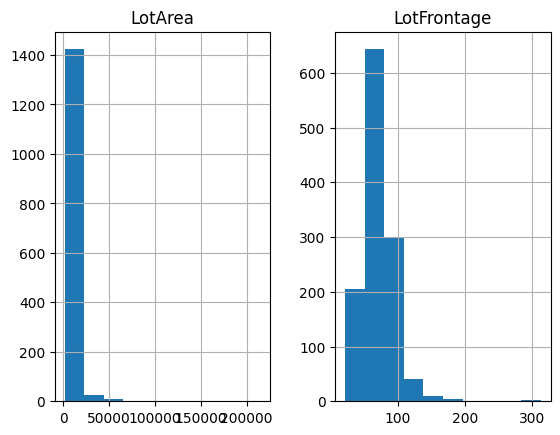

In [26]:
# visualizing two columns for identifying the outliers in the columns using histogram
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.hist('LotArea', ax=axes[0]);
df_train.hist('LotFrontage', ax=axes[1]);

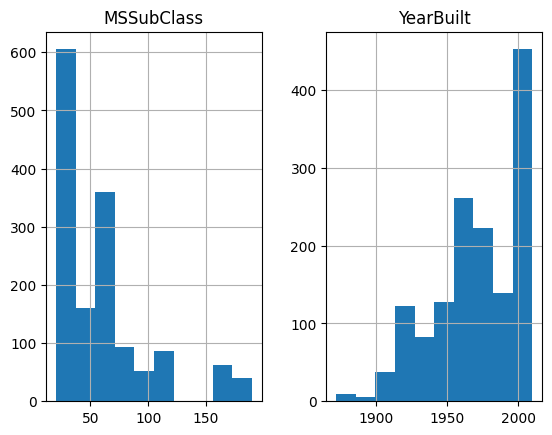

In [27]:
# visualizing two columns for identifying the outliers in the columns using histogram
fig, axes = plt.subplots(1, 2);

df_train.hist('MSSubClass', ax=axes[0]);
df_train.hist('YearBuilt', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

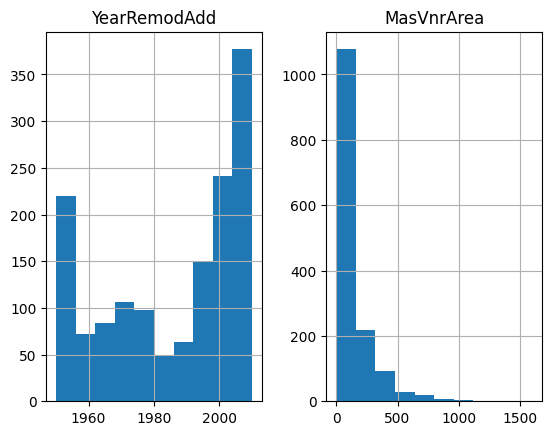

In [28]:
# visualizing two columns for identifying the outliers in the columns using histogram
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.hist('YearRemodAdd', ax=axes[0]);
df_train.hist('MasVnrArea', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

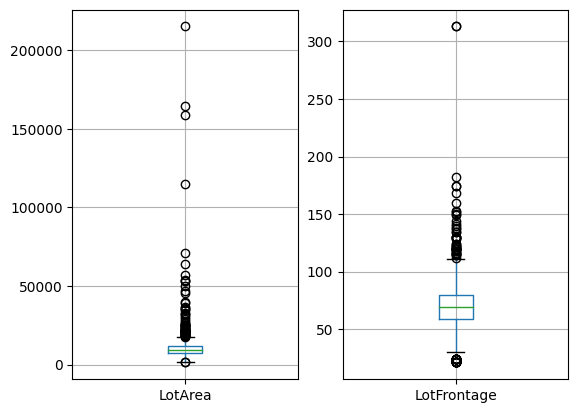

In [29]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.boxplot('LotArea', ax=axes[0]);
df_train.boxplot('LotFrontage', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

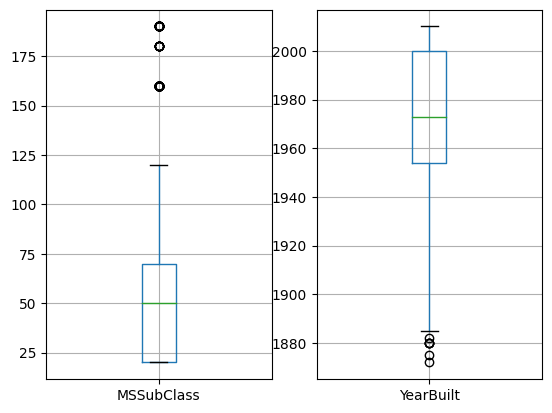

In [30]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.boxplot('MSSubClass', ax=axes[0]);
df_train.boxplot('YearBuilt', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

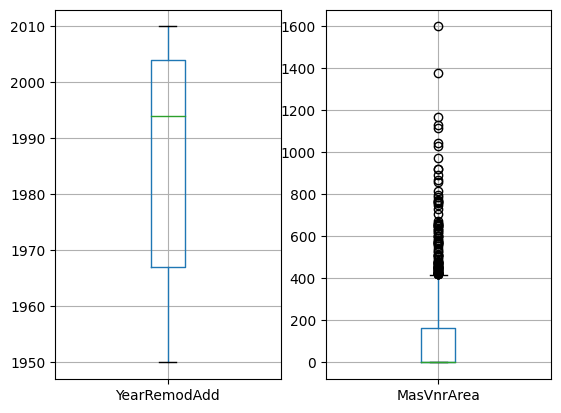

In [31]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.boxplot('YearRemodAdd', ax=axes[0]);
df_train.boxplot('MasVnrArea', ax=axes[1]);

<ipython-input-32-2e7cf1ec86a0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df_train.corr(), cmap="YlGnBu", annot=True);


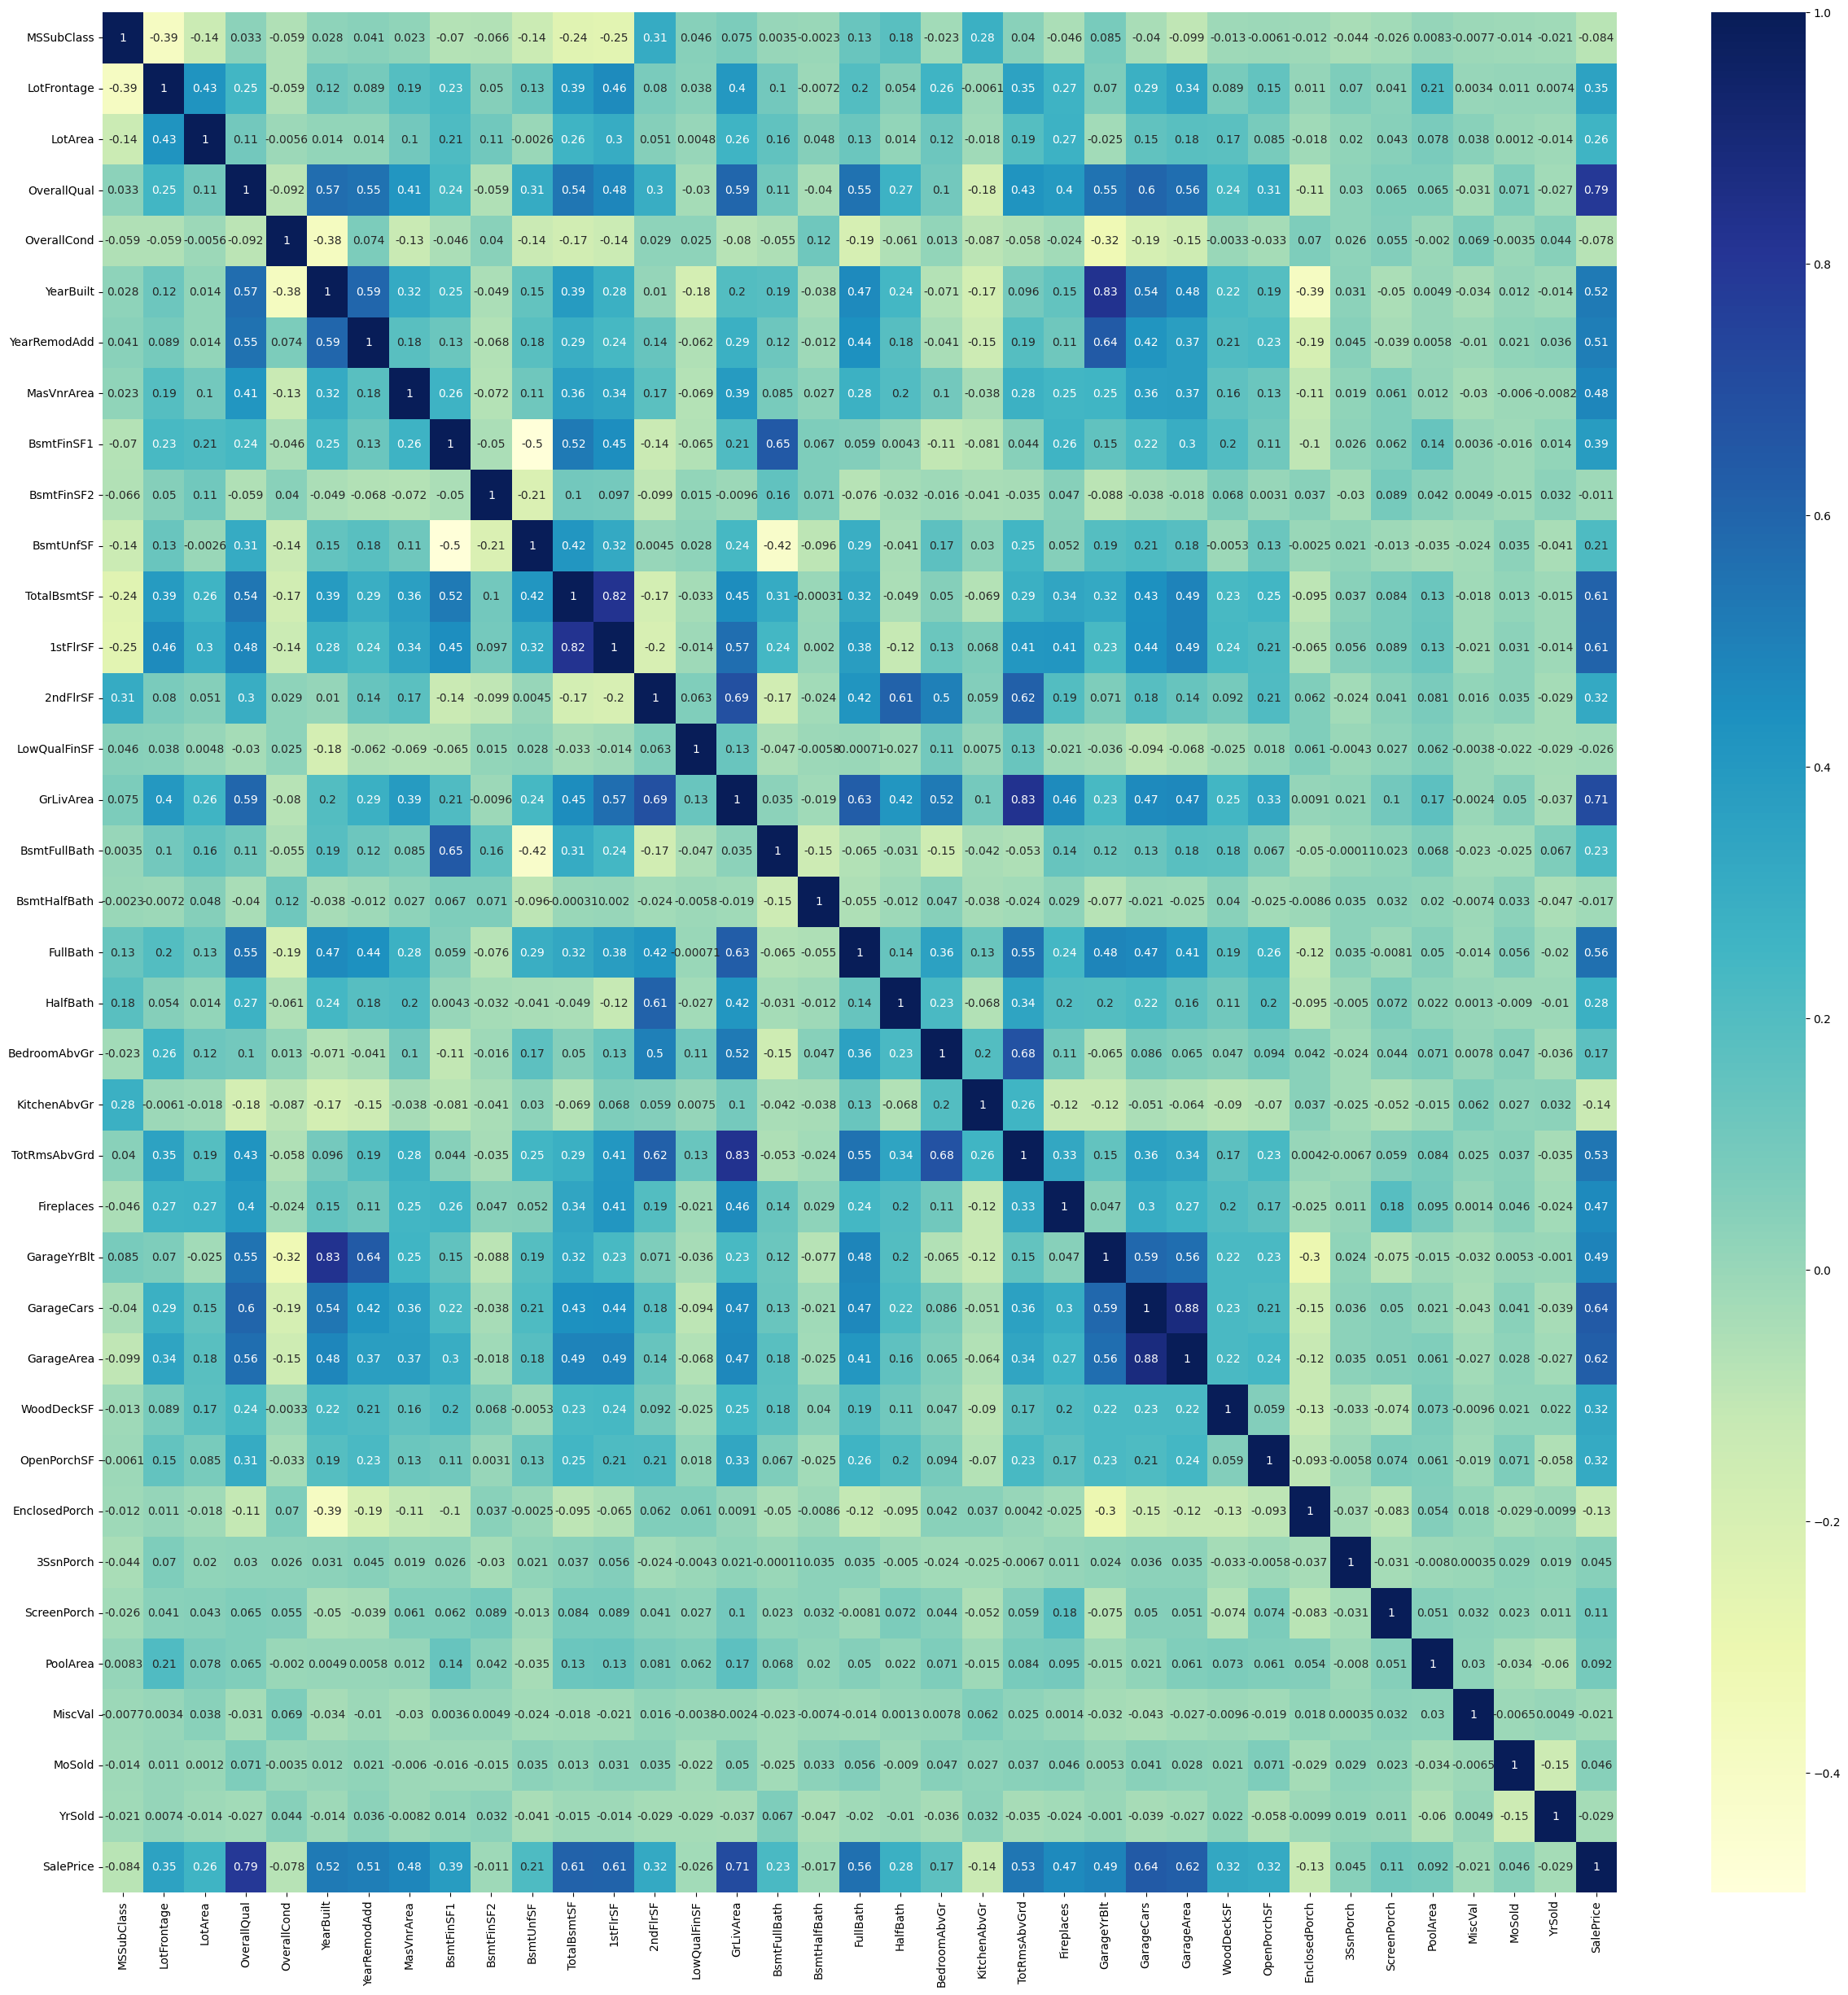

In [32]:
# plotting correlation heatmap
import seaborn as sb
plt.figure(figsize=(30, 30));
dataplot = sb.heatmap(df_train.corr(), cmap="YlGnBu", annot=True);

# displaying heatmap
plt.show();

In [33]:
# How to see highly correlated features in dataset

l=[]
corr_matrix = df_train.corr().abs()

for ci in corr_matrix.columns:
    for cj in corr_matrix.columns:
        if (corr_matrix[ci][cj]>0.8 and ci!=cj):
            l.append(ci)



<ipython-input-33-0ff46bd82d78>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr().abs()


In [34]:
# features that are having correlations above 80 percent
print(l)

['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']


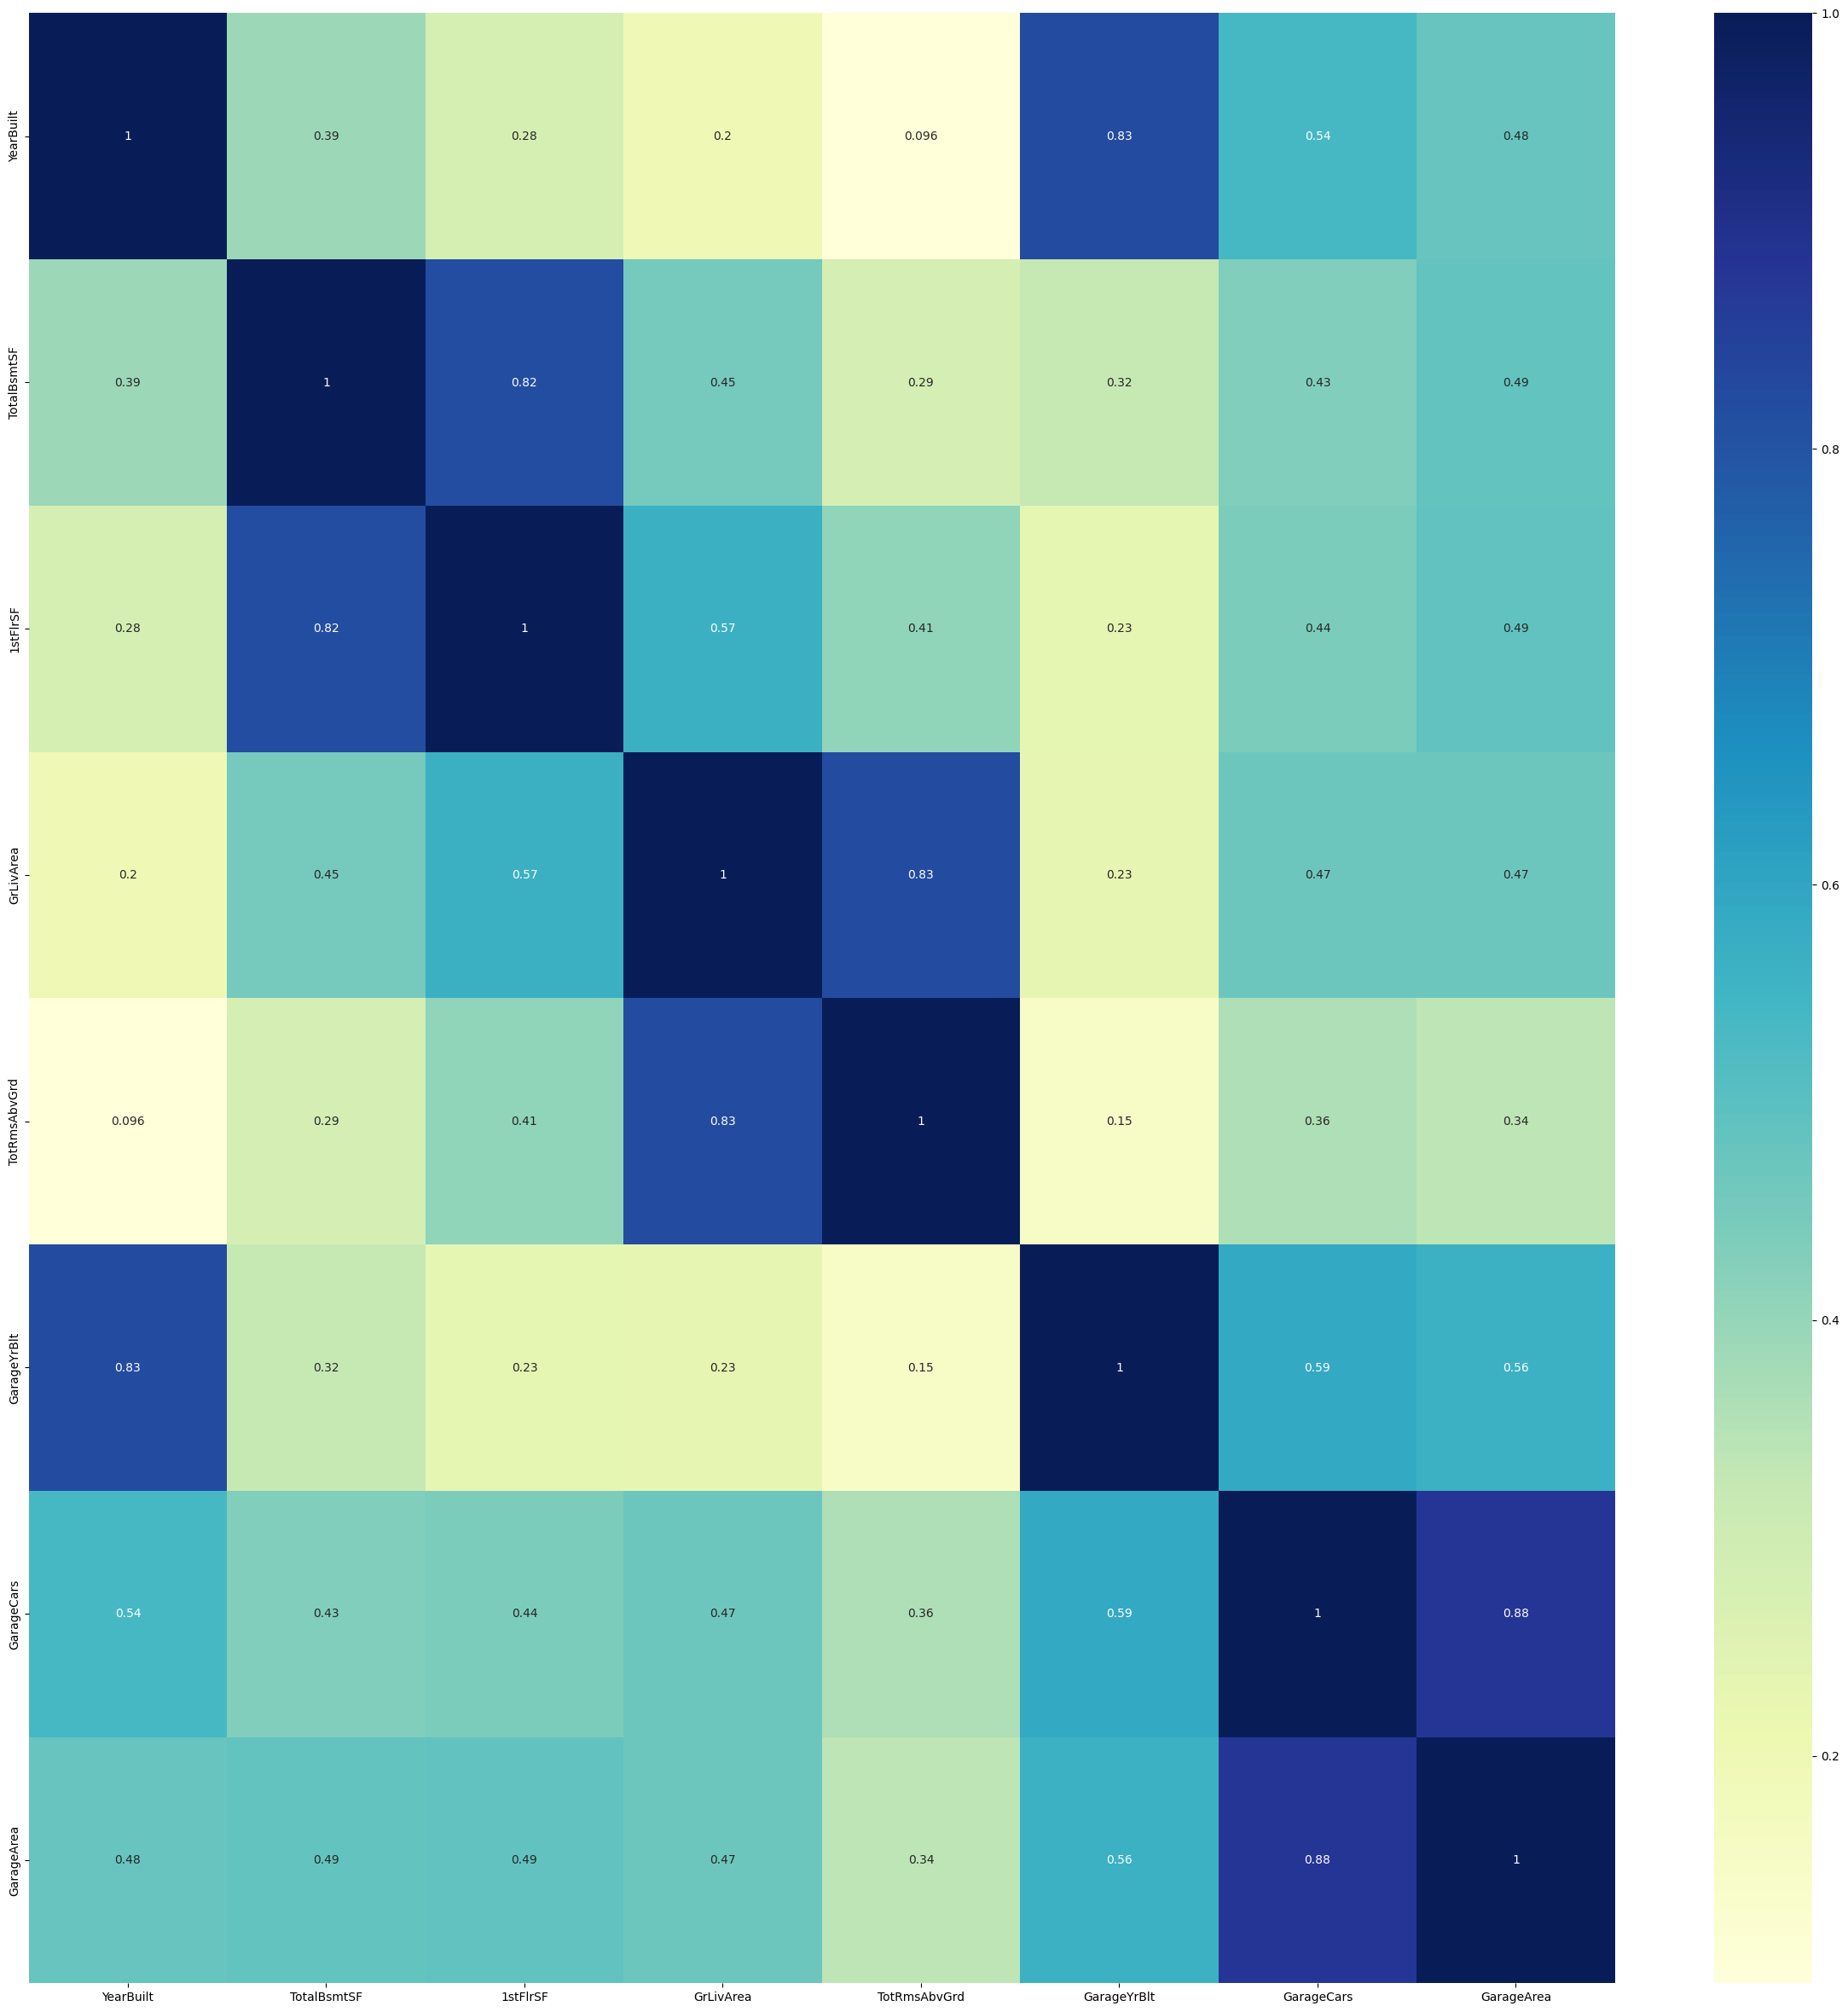

In [35]:

# plotting highly correlated features in heatmap
import seaborn as sb
plt.figure(figsize=(30, 30));
dataplot = sb.heatmap(df_train[l].corr(), cmap="YlGnBu", annot=True);

# displaying heatmap
plt.show();

In [36]:
# calculate variance if variance is less than 10 percent than eliminate the columns

df_var = df_train.var()
df_var = pd.DataFrame(df_var)

<ipython-input-36-7e840cb9bf2a>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_var = df_train.var()


In [37]:
df_var['Index'] = df_var.index

In [38]:
df_var

0          Index
MSSubClass     1.789338e+03     MSSubClass
LotFrontage    5.897492e+02    LotFrontage
LotArea        9.962565e+07        LotArea
OverallQual    1.912679e+00    OverallQual
OverallCond    1.238322e+00    OverallCond
YearBuilt      9.122154e+02      YearBuilt
YearRemodAdd   4.262328e+02   YearRemodAdd
MasVnrArea     3.278497e+04     MasVnrArea
BsmtFinSF1     2.080255e+05     BsmtFinSF1
BsmtFinSF2     2.602391e+04     BsmtFinSF2
BsmtUnfSF      1.952464e+05      BsmtUnfSF
TotalBsmtSF    1.924624e+05    TotalBsmtSF
1stFlrSF       1.494501e+05       1stFlrSF
2ndFlrSF       1.905571e+05       2ndFlrSF
LowQualFinSF   2.364204e+03   LowQualFinSF
GrLivArea      2.761296e+05      GrLivArea
BsmtFullBath   2.692682e-01   BsmtFullBath
BsmtHalfBath   5.700283e-02   BsmtHalfBath
FullBath       3.035082e-01       FullBath
HalfBath       2.528937e-01       HalfBath
BedroomAbvGr   6.654938e-01   BedroomAbvGr
KitchenAbvGr   4.854892e-02   KitchenAbvGr
TotRmsAbvGrd   2.641903e+00   TotRmsAbvGrd
Fireplaces     4.155947e-01     Fireplaces
GarageYrBlt    6.095825e+02    GarageYrBlt
GarageCars     5.584797e-01     GarageCars
GarageArea     4.571251e+04     GarageArea
WoodDeckSF     1.570981e+04     WoodDeckSF
OpenPorchSF    4.389861e+03    OpenPorchSF
EnclosedPorch  3.735550e+03  EnclosedPorch
3SsnPorch      8.595059e+02      3SsnPorch
ScreenPorch    3.108889e+03    ScreenPorch
PoolArea       1.614216e+03       PoolArea
MiscVal        2.461381e+05        MiscVal
MoSold         7.309595e+00         MoSold
YrSold         1.763837e+00         YrSold
SalePrice      6.311111e+09      SalePrice

In [39]:
df_var.columns = ["Variance", "Index"]
df_var

Variance          Index
MSSubClass     1.789338e+03     MSSubClass
LotFrontage    5.897492e+02    LotFrontage
LotArea        9.962565e+07        LotArea
OverallQual    1.912679e+00    OverallQual
OverallCond    1.238322e+00    OverallCond
YearBuilt      9.122154e+02      YearBuilt
YearRemodAdd   4.262328e+02   YearRemodAdd
MasVnrArea     3.278497e+04     MasVnrArea
BsmtFinSF1     2.080255e+05     BsmtFinSF1
BsmtFinSF2     2.602391e+04     BsmtFinSF2
BsmtUnfSF      1.952464e+05      BsmtUnfSF
TotalBsmtSF    1.924624e+05    TotalBsmtSF
1stFlrSF       1.494501e+05       1stFlrSF
2ndFlrSF       1.905571e+05       2ndFlrSF
LowQualFinSF   2.364204e+03   LowQualFinSF
GrLivArea      2.761296e+05      GrLivArea
BsmtFullBath   2.692682e-01   BsmtFullBath
BsmtHalfBath   5.700283e-02   BsmtHalfBath
FullBath       3.035082e-01       FullBath
HalfBath       2.528937e-01       HalfBath
BedroomAbvGr   6.654938e-01   BedroomAbvGr
KitchenAbvGr   4.854892e-02   KitchenAbvGr
TotRmsAbvGrd   2.641903e+00   TotRmsAbvGrd
Fireplaces     4.155947e-01     Fireplaces
GarageYrBlt    6.095825e+02    GarageYrBlt
GarageCars     5.584797e-01     GarageCars
GarageArea     4.571251e+04     GarageArea
WoodDeckSF     1.570981e+04     WoodDeckSF
OpenPorchSF    4.389861e+03    OpenPorchSF
EnclosedPorch  3.735550e+03  EnclosedPorch
3SsnPorch      8.595059e+02      3SsnPorch
ScreenPorch    3.108889e+03    ScreenPorch
PoolArea       1.614216e+03       PoolArea
MiscVal        2.461381e+05        MiscVal
MoSold         7.309595e+00         MoSold
YrSold         1.763837e+00         YrSold
SalePrice      6.311111e+09      SalePrice

In [40]:
# identifying the column having less than 10 percent variance
df_var[df_var['Variance'] <= 0.10]

Variance         Index
BsmtHalfBath  0.057003  BsmtHalfBath
KitchenAbvGr  0.048549  KitchenAbvGr

In [41]:
df_train.shape

(1460, 75)

In [42]:
# after dropping theses two columns
df_train.drop(["BsmtHalfBath","KitchenAbvGr"], axis = 1, inplace = True)
df_train.shape

(1460, 73)

In [43]:
df_train['SalePrice'].nunique()

663

In [44]:
df_col = df_train.select_dtypes(include = "object")
df_col.isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [45]:
df_col = obj_func(df_col)

In [46]:
# after filling the values with mode
df_col.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [47]:
# dropping the categorical column from the dataframe
df_train.drop(columns = df_col.columns , axis = 1 , inplace = True)

In [48]:
df_col.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [49]:
df_col.shape

(1460, 38)

In [50]:
# converting the categorical column into one hot encoding
df_col = pd.get_dummies(df_col, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
df_col.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0            0            1             0             0             0   
1            0            1             0             0             0   
2            0            1             1             0             0   
3            0            1             1             0             0   
4            0            1             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0             1                0                0                0   
1             1                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             0                0                0                0   

   LandContour_Lvl  Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  \
0                1                 1                 0                 0   
1                1                 1                 0                 0   
2                1                 1                 0                 0   
3                1                 1                 0                 1   
4                1                 1                 0                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0              1              0              0                     0   
1              1              0              0                     0   
2              1              0              0                     0   
3              1              0              0                     0   
4              1              0              0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0        

In [51]:
df_col.shape

(1460, 234)

In [52]:
df_final = pd.concat([df_train, df_col], axis=1)
df_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0       856       854             0       1710             1         2   
1      1262         0             0       1262             0         2   
2       920       866             0       1786             1         2   
3       961       756             0       1717             1         1   
4      1145      1053             0       2198             1         2   

   HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0         1             3             8           0       2003.0           2   
1         0             3             6           1       1976.0           2   
2         1             3             6           1       2001.0           2   
3         0             3             7           1       1998.0           3   
4         1             4             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_C (all)  \
0         0        0       2    2008     208500                 0   
1         0        0       5    2007     181500                 0   
2         0        0       9    2008     223500                 0   
3         0        0       2    2006     140000                 0   
4         0        0      12    2008     250000                 0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1             0             0             0             1   
1            1             0             0             0             1   
2            1             1             0             0             0   
3            1             1             0             0             0   
4            1             1             0             0             0   

   LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4           

In [53]:
df_final["SalePrice"].nunique()

663

In [54]:
df_final.shape

(1460, 269)

In [55]:
df_final.isna().sum()

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MoSold                     0
YrSold                     0
SalePrice     

In [56]:
df_num = df_final.select_dtypes(include = ['int64','float64'])
num_numerical_col = df_num.columns.tolist()

In [57]:
# before detecting the outliers
df_final.isna().sum()

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               81
GarageCars                 0
GarageArea                 0
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MoSold                     0
YrSold                     0
SalePrice     

In [58]:
# detecting outliers from the df_final data frame
for ele in num_numerical_col:
    q75,q25 = np.percentile(df_final.loc[:,ele],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_final.loc[df_final[ele] < min,ele] = np.nan
    df_final.loc[df_final[ele] > max,ele] = np.nan

In [59]:
# after detecting the outliers
df_final.isna().sum()

MSSubClass               103
LotFrontage              259
LotArea                   69
OverallQual                2
OverallCond              125
YearBuilt                  7
YearRemodAdd               0
MasVnrArea                 8
BsmtFinSF1                 7
BsmtFinSF2               167
BsmtUnfSF                 29
TotalBsmtSF               61
1stFlrSF                  20
2ndFlrSF                   2
LowQualFinSF              26
GrLivArea                 31
BsmtFullBath               1
FullBath                   0
HalfBath                   0
BedroomAbvGr              35
TotRmsAbvGrd              30
Fireplaces                 5
GarageYrBlt               81
GarageCars                 5
GarageArea                21
WoodDeckSF                32
OpenPorchSF               77
EnclosedPorch            208
3SsnPorch                 24
ScreenPorch              116
PoolArea                   7
MiscVal                   52
MoSold                     0
YrSold                     0
SalePrice     

In [60]:
# after filling the values with mean in the outliers
df_final = mean_func(df_final)
df_final.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
SalePrice                0
MSZoning_C (all)         0
MSZoning_FV              0
M

# Building the Model

In [61]:
X = df_final.drop("SalePrice", axis = 1)
y = df_final['SalePrice']

In [62]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(978, 268) (482, 268) (978,) (482,)


In [63]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor as RF

# create regressor object
regressor_random = RF(n_estimators = 100, random_state = 0)

In [64]:
model , predictions = model_handler_train(regressor_random, X_train, y_train)

R squared: 96.52
Mean Absolute Error: 7139.1271075965715
Mean Square Error: 112810535.45889646
Root Mean Square Error: 10621.230411722385


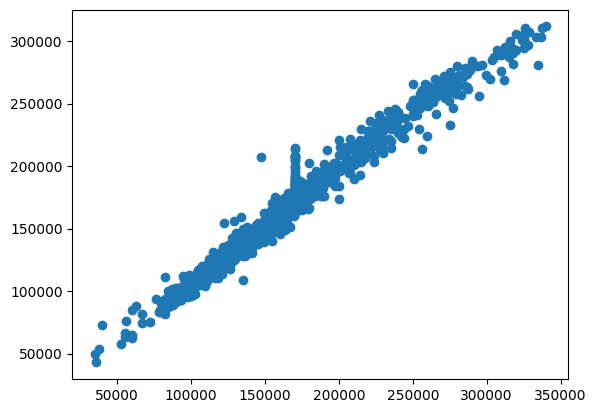

In [65]:
plt.scatter(y_train , predictions)

In [66]:
pred_test = model.predict(X_test)

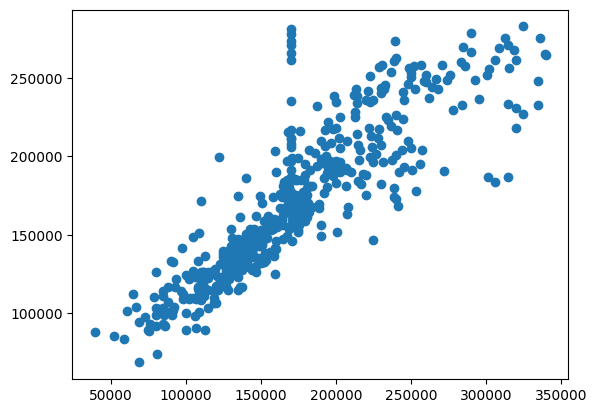

In [67]:
plt.scatter(y_test , pred_test)

In [68]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 75.73


# Randomized search CV for Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [70]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 43, 76, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 1100, 2000]}


In [71]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 5.98 s, sys: 375 ms, total: 6.35 s
Wall time: 2min 10s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 43, 76, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [200, 1100, 2000]},
                   random_state=42, verbose=2)

In [72]:
print(rf_random.best_params_)

{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [73]:
best_random = rf_random.best_estimator_
model , predictions = model_handler_train(best_random, X_train, y_train)

R squared: 99.07
Mean Absolute Error: 3615.2155716547613
Mean Square Error: 30050651.867825456
Root Mean Square Error: 5481.847486735239


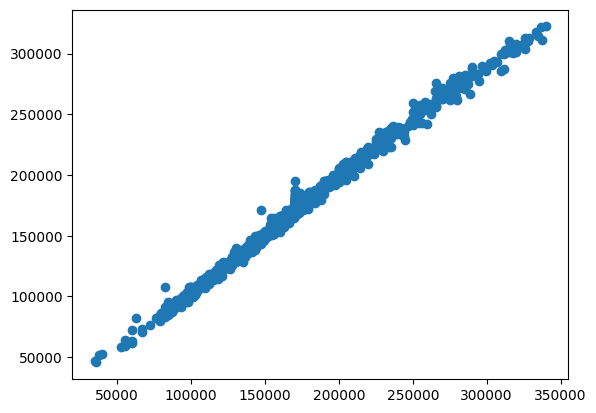

In [74]:
plt.scatter(y_train , predictions)

In [75]:
pred_test = model.predict(X_test)

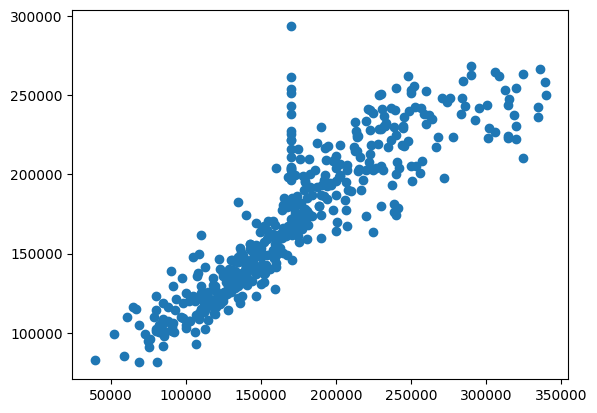

In [76]:
plt.scatter(y_test , pred_test)

In [77]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 77.71


# XGBRegressor

In [78]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [79]:
model , predictions = model_handler_train(xgb, X_train, y_train)

R squared: 99.98
Mean Absolute Error: 596.4651524107339
Mean Square Error: 696050.9186764989
Root Mean Square Error: 834.2966610723663


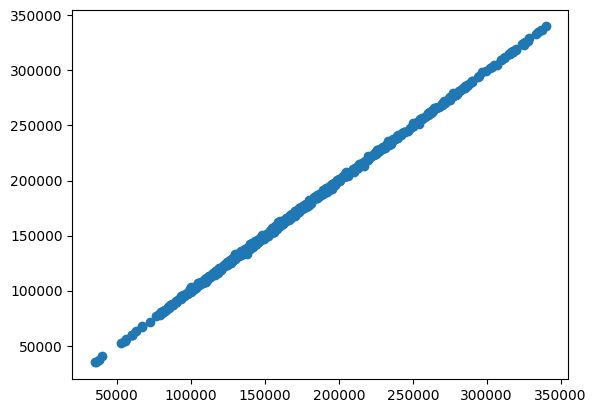

In [80]:
plt.scatter(y_train , predictions)

In [81]:
pred_test = model.predict(X_test)

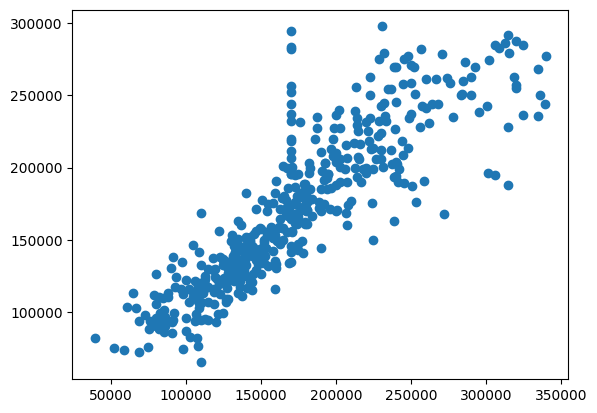

In [82]:
plt.scatter(y_test , pred_test)

In [83]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 76.43


# Hyperparameter tuning in XGBRegression

In [84]:
regressor = XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=500, n_jobs=16, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [85]:
model , predictions = model_handler_train(regressor, X_train, y_train)

R squared: 80.22
Mean Absolute Error: 17276.308041930395
Mean Square Error: 642222847.8510368
Root Mean Square Error: 25342.116088658357


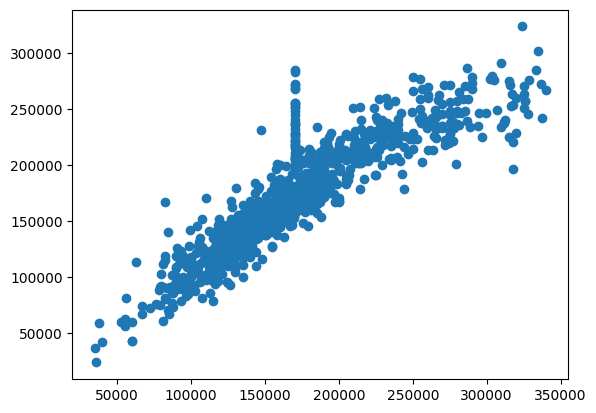

In [86]:
plt.scatter(y_train , predictions)

In [87]:
pred_test = model.predict(X_test)

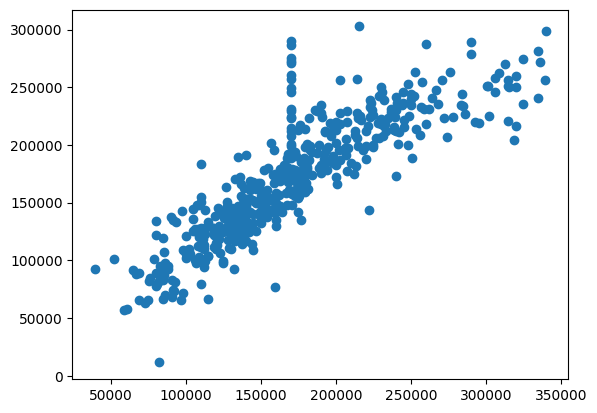

In [88]:
plt.scatter(y_test , pred_test)

In [89]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 74.10


# PCA

In [156]:
X = df_final.drop("SalePrice", axis = 1)
y = df_final['SalePrice']

In [140]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

rescaled_data = sc.fit_transform(X)

In [141]:
rescaled_data.shape

(1460, 268)

In [143]:
rescaled_data[:5]

array([[ 0.4170641 , -0.22937175, -0.2637049 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.00404319,  0.4519361 ,  0.10498444, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.4170641 , -0.09311018,  0.6339735 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.77234092, -0.45647437,  0.08895447, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 0.4170641 ,  0.63361819,  1.59897777, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [145]:
from sklearn.decomposition import PCA

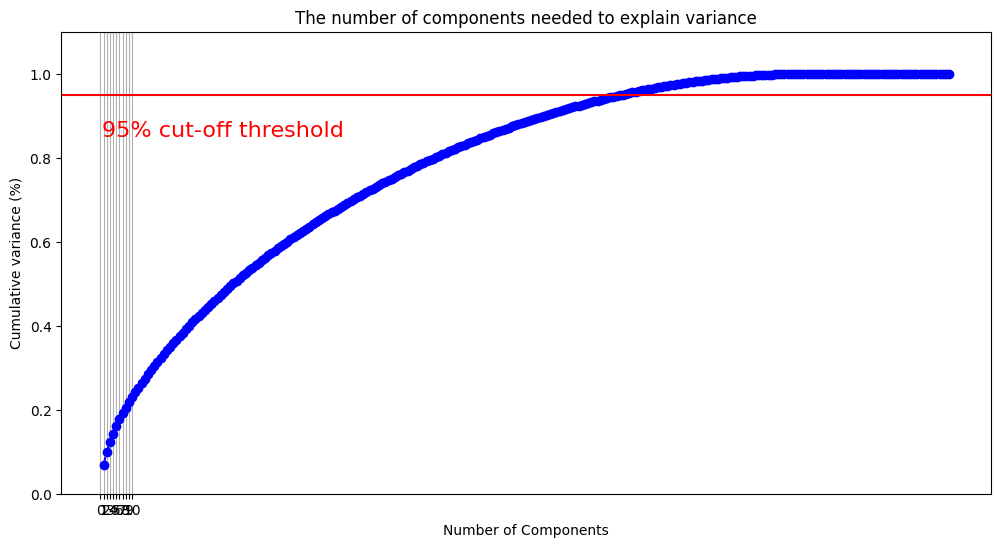

In [152]:
# Selecting number of features from the given plot
pca = PCA().fit(rescaled_data)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, df_final.shape[1], step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [153]:
pca = PCA(n_components = 10)
x_pca = pca.fit_transform(rescaled_data)

In [154]:
x_pca.shape

(1460, 10)

In [157]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(978, 10) (482, 10) (978,) (482,)


In [158]:
# applying random forest regression in pca data
best_random = rf_random.best_estimator_
model , predictions = model_handler_train(best_random, X_train, y_train)

R squared: 99.54
Mean Absolute Error: 2552.340654905493
Mean Square Error: 15703715.555117777
Root Mean Square Error: 3962.7913842540056


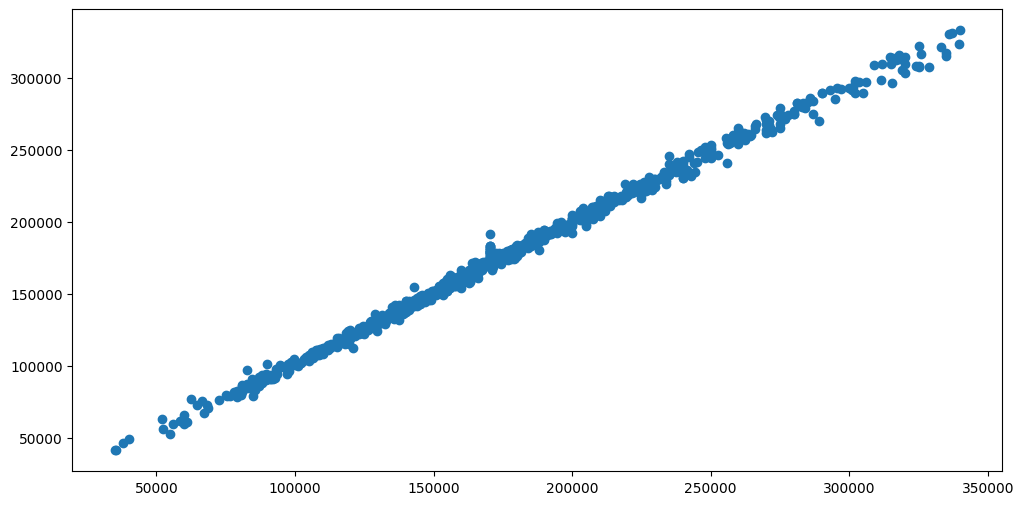

In [159]:
plt.scatter(y_train , predictions)

In [160]:
pred_test = model.predict(X_test)

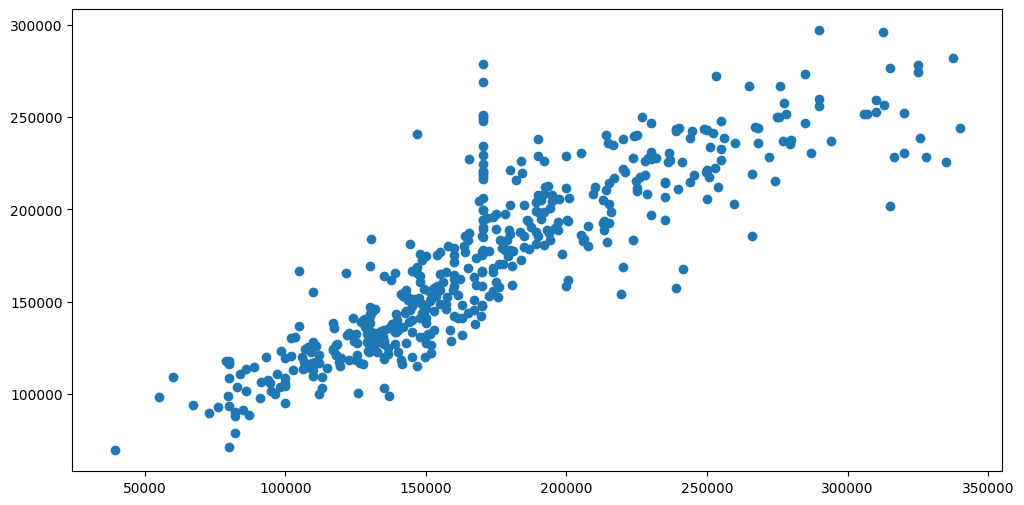

In [161]:
plt.scatter(y_test , pred_test)

In [162]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 76.52


# Working on test-data

In [163]:
test_data = pd.read_csv(path + 'test.csv')
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [164]:
df_final.shape

(1460, 269)

In [165]:
test_data.shape

(1459, 80)

In [166]:
# eliminating NA's from columns
test_data = NA_func(test_data)
test_data.shape

(1459, 75)

In [167]:
# eliminating using identifier

test_data = eliminate_identifier(test_data)
test_data.shape

(1459, 74)

<Figure size 5000x5000 with 0 Axes>

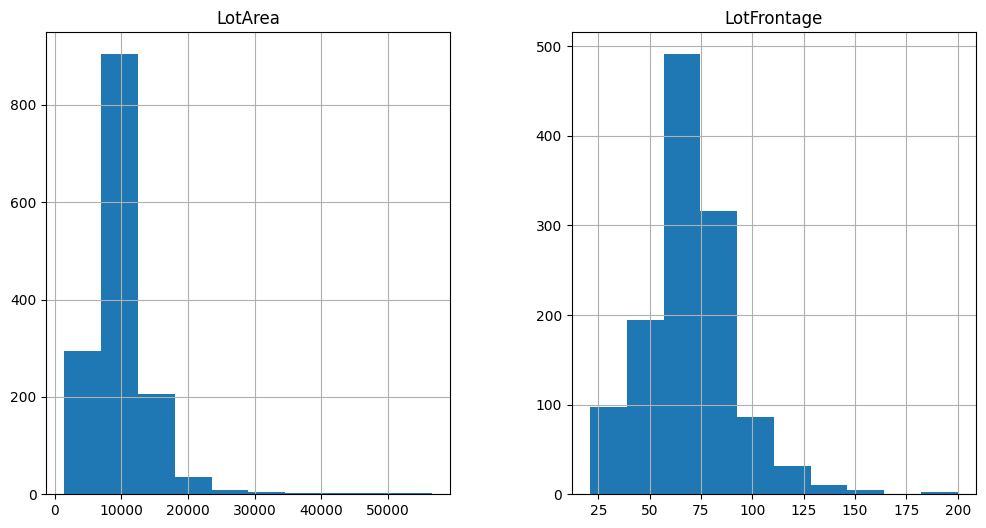

In [168]:
# visualizing two columns for identifying the outliers in the columns using histogram
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

test_data.hist('LotArea', ax=axes[0]);
test_data.hist('LotFrontage', ax=axes[1]);

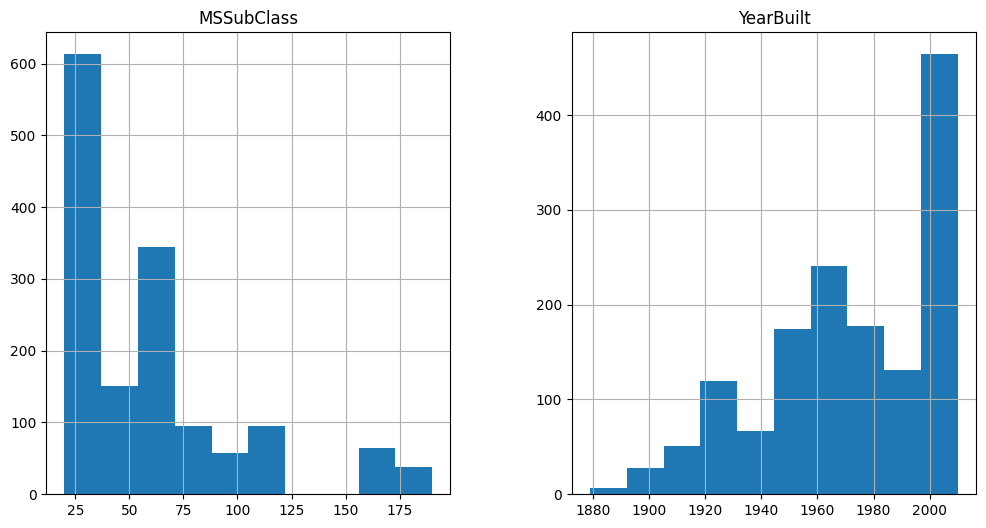

In [169]:
# visualizing two columns for identifying the outliers in the columns using histogram
fig, axes = plt.subplots(1, 2);

test_data.hist('MSSubClass', ax=axes[0]);
test_data.hist('YearBuilt', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

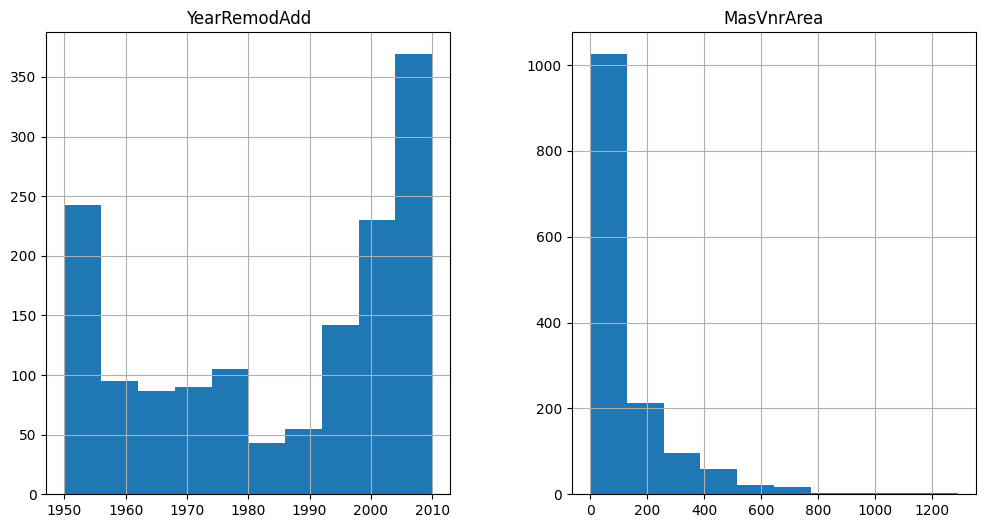

In [170]:
# visualizing two columns for identifying the outliers in the columns using histogram
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

test_data.hist('YearRemodAdd', ax=axes[0]);
test_data.hist('MasVnrArea', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

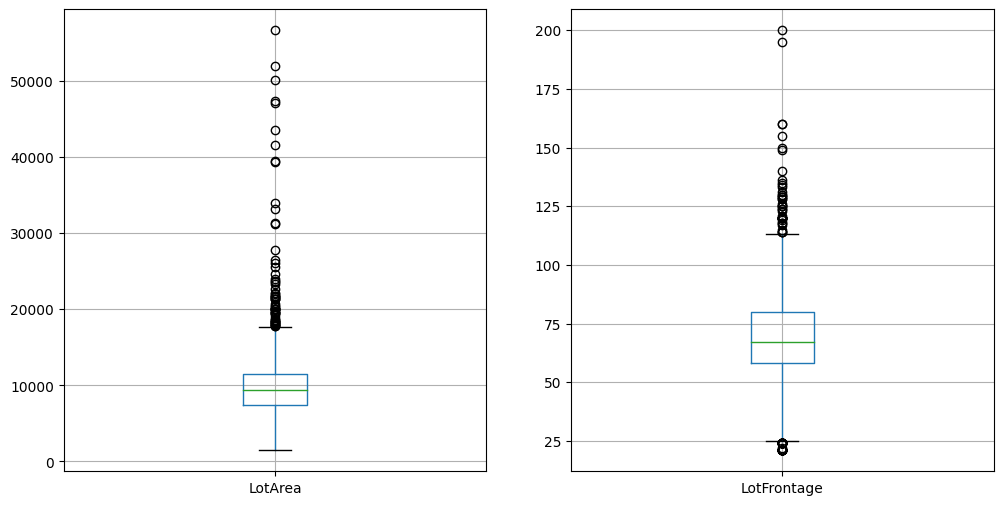

In [171]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

test_data.boxplot('LotArea', ax=axes[0]);
test_data.boxplot('LotFrontage', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

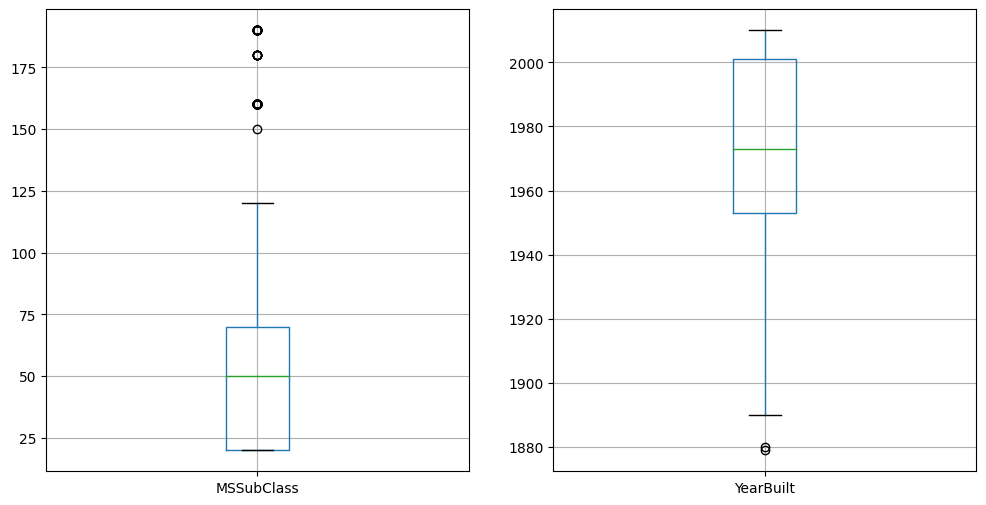

In [172]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

test_data.boxplot('MSSubClass', ax=axes[0]);
test_data.boxplot('YearBuilt', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

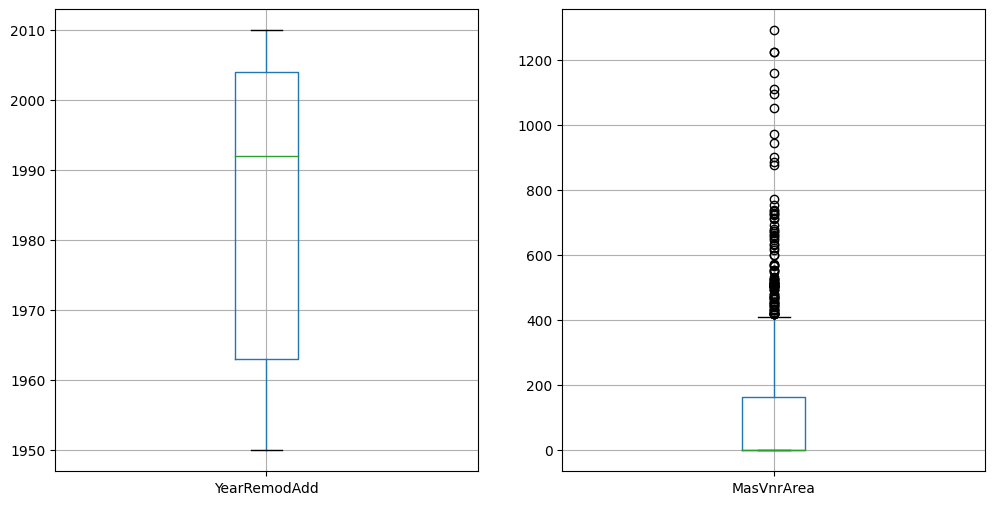

In [173]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

test_data.boxplot('YearRemodAdd', ax=axes[0]);
test_data.boxplot('MasVnrArea', ax=axes[1]);

<ipython-input-174-940af3e70d2d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(test_data.corr(), cmap="YlGnBu", annot=True);


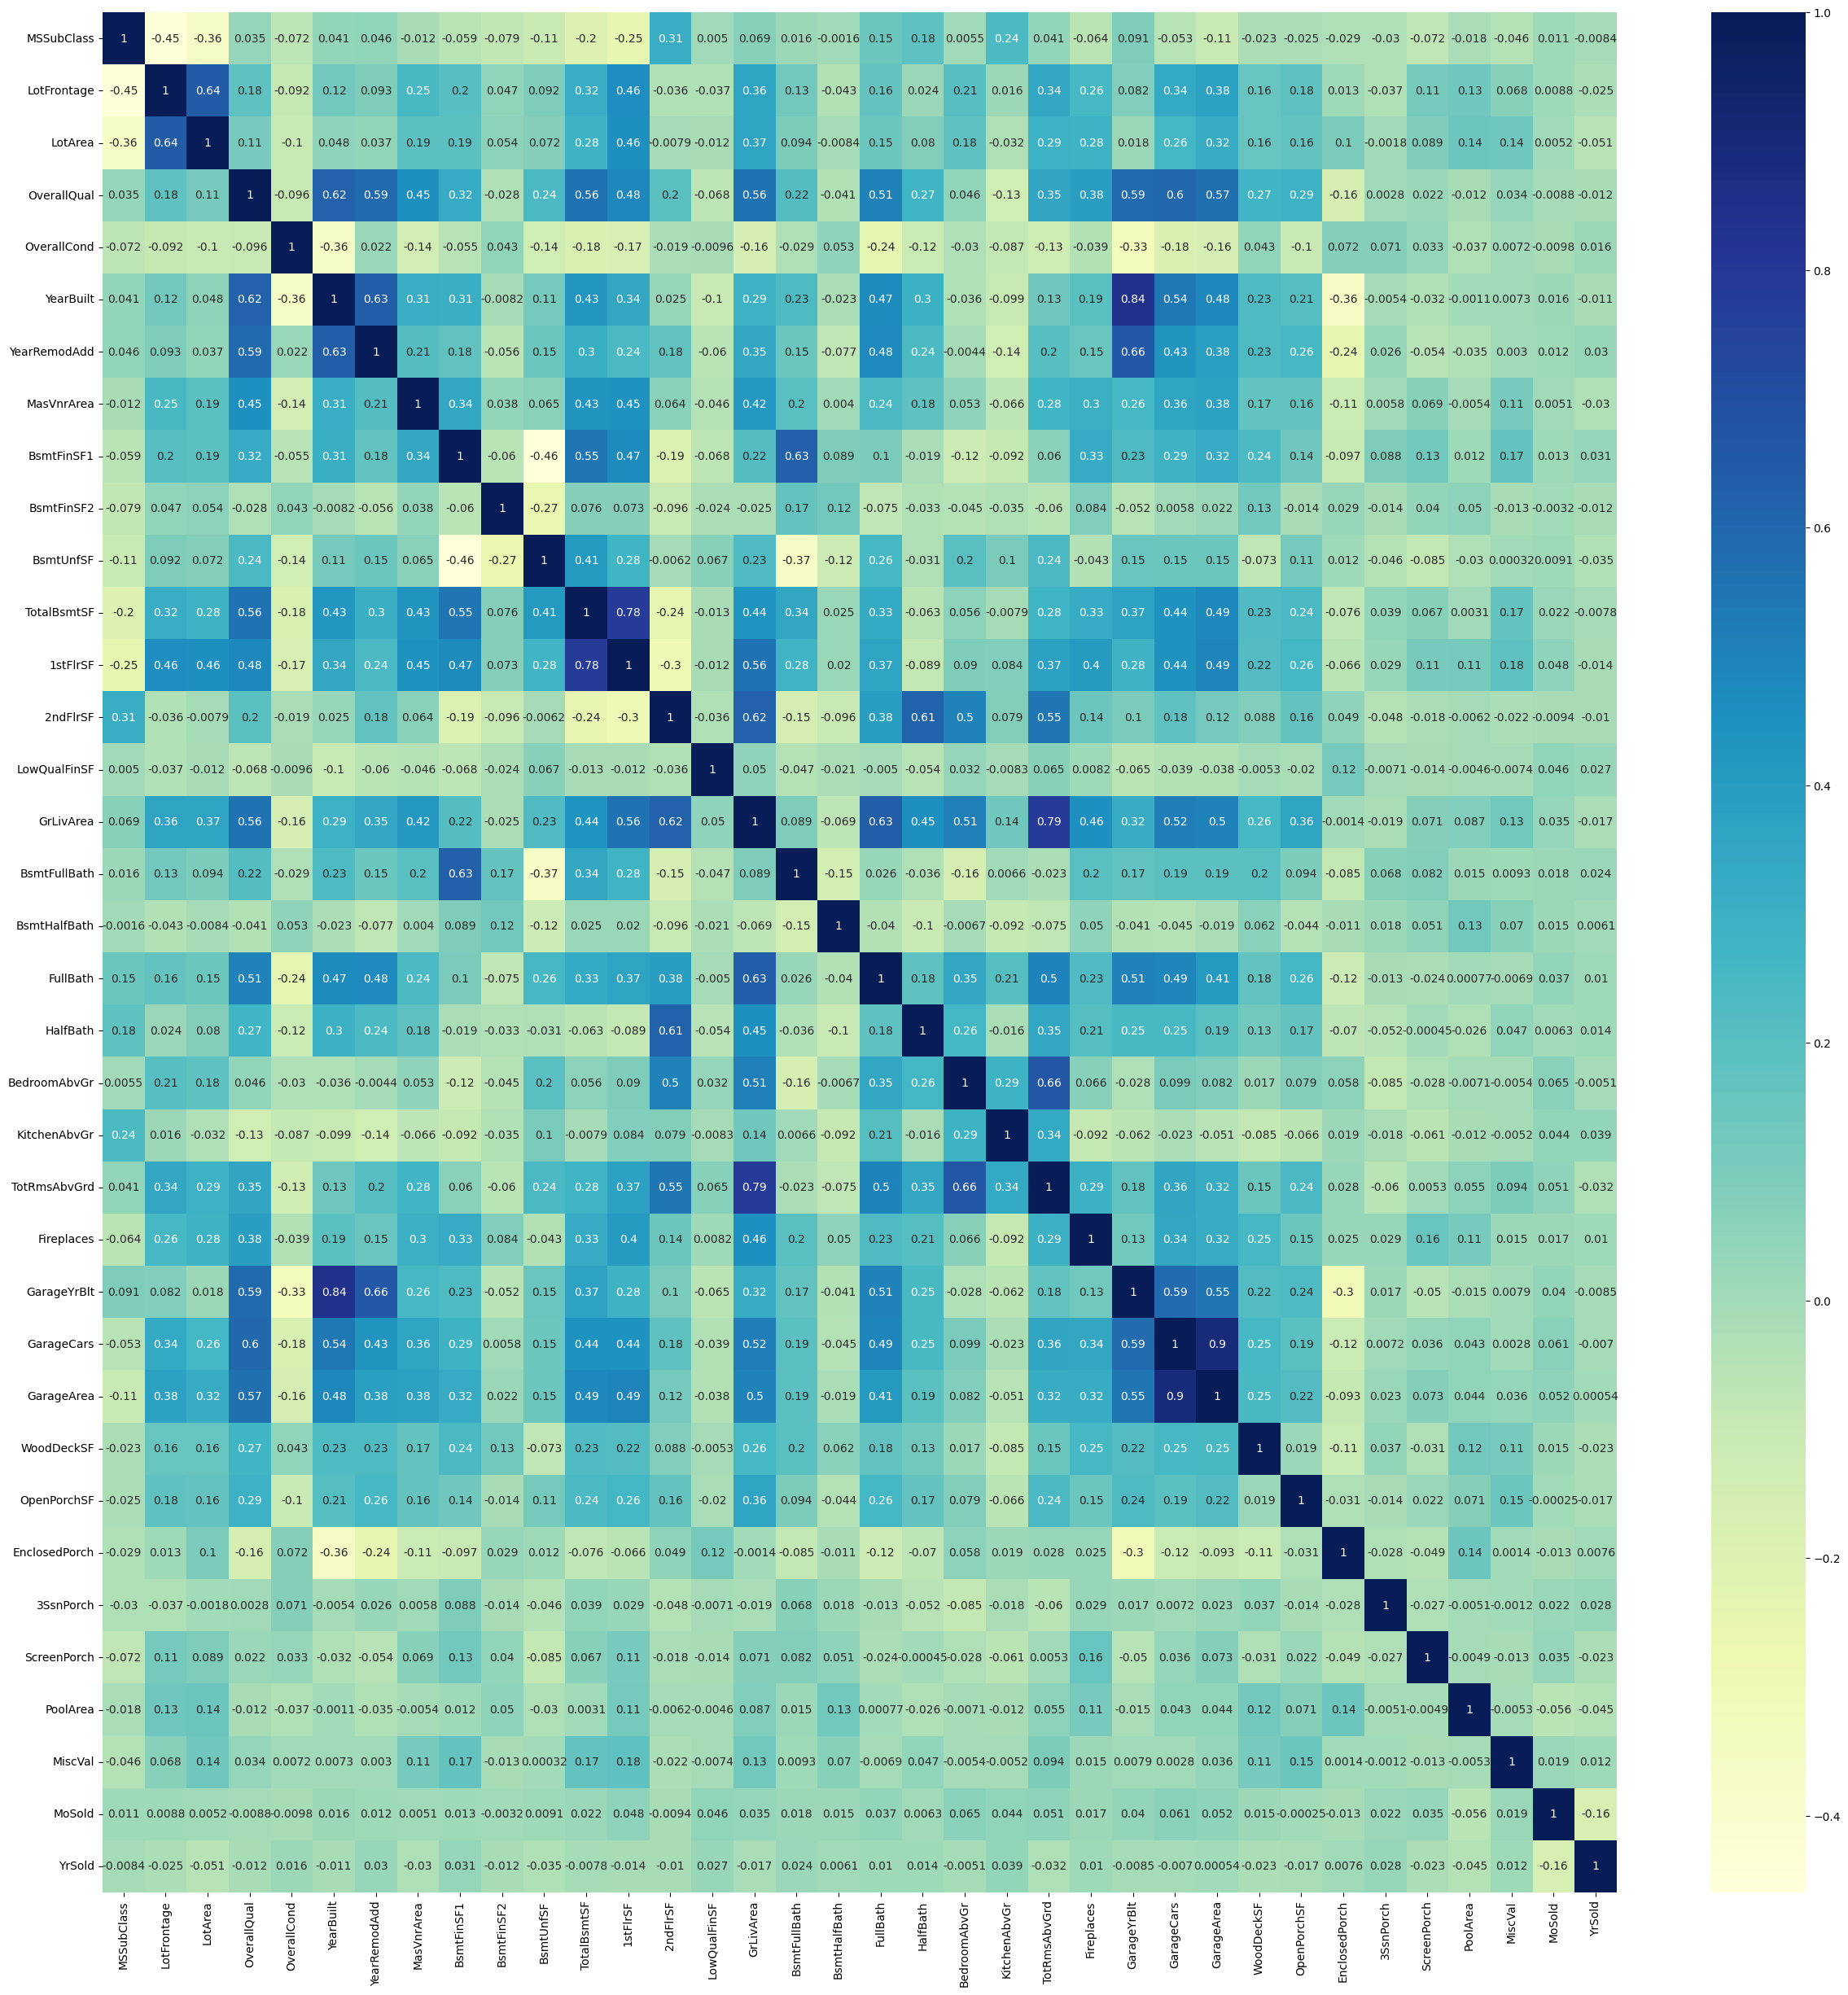

In [174]:
# plotting correlation heatmap
import seaborn as sb
plt.figure(figsize=(30, 30));
dataplot = sb.heatmap(test_data.corr(), cmap="YlGnBu", annot=True);

# displaying heatmap
plt.show();

In [175]:
# How to see highly correlated features in dataset

l=[]
corr_matrix = test_data.corr().abs()

for ci in corr_matrix.columns:
    for cj in corr_matrix.columns:
        if (corr_matrix[ci][cj]>0.8 and ci!=cj):
            l.append(ci)



<ipython-input-175-df78b4c4483e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = test_data.corr().abs()


In [176]:
# features that are having correlations above 80 percent
print(l)

['YearBuilt', 'GarageYrBlt', 'GarageCars', 'GarageArea']


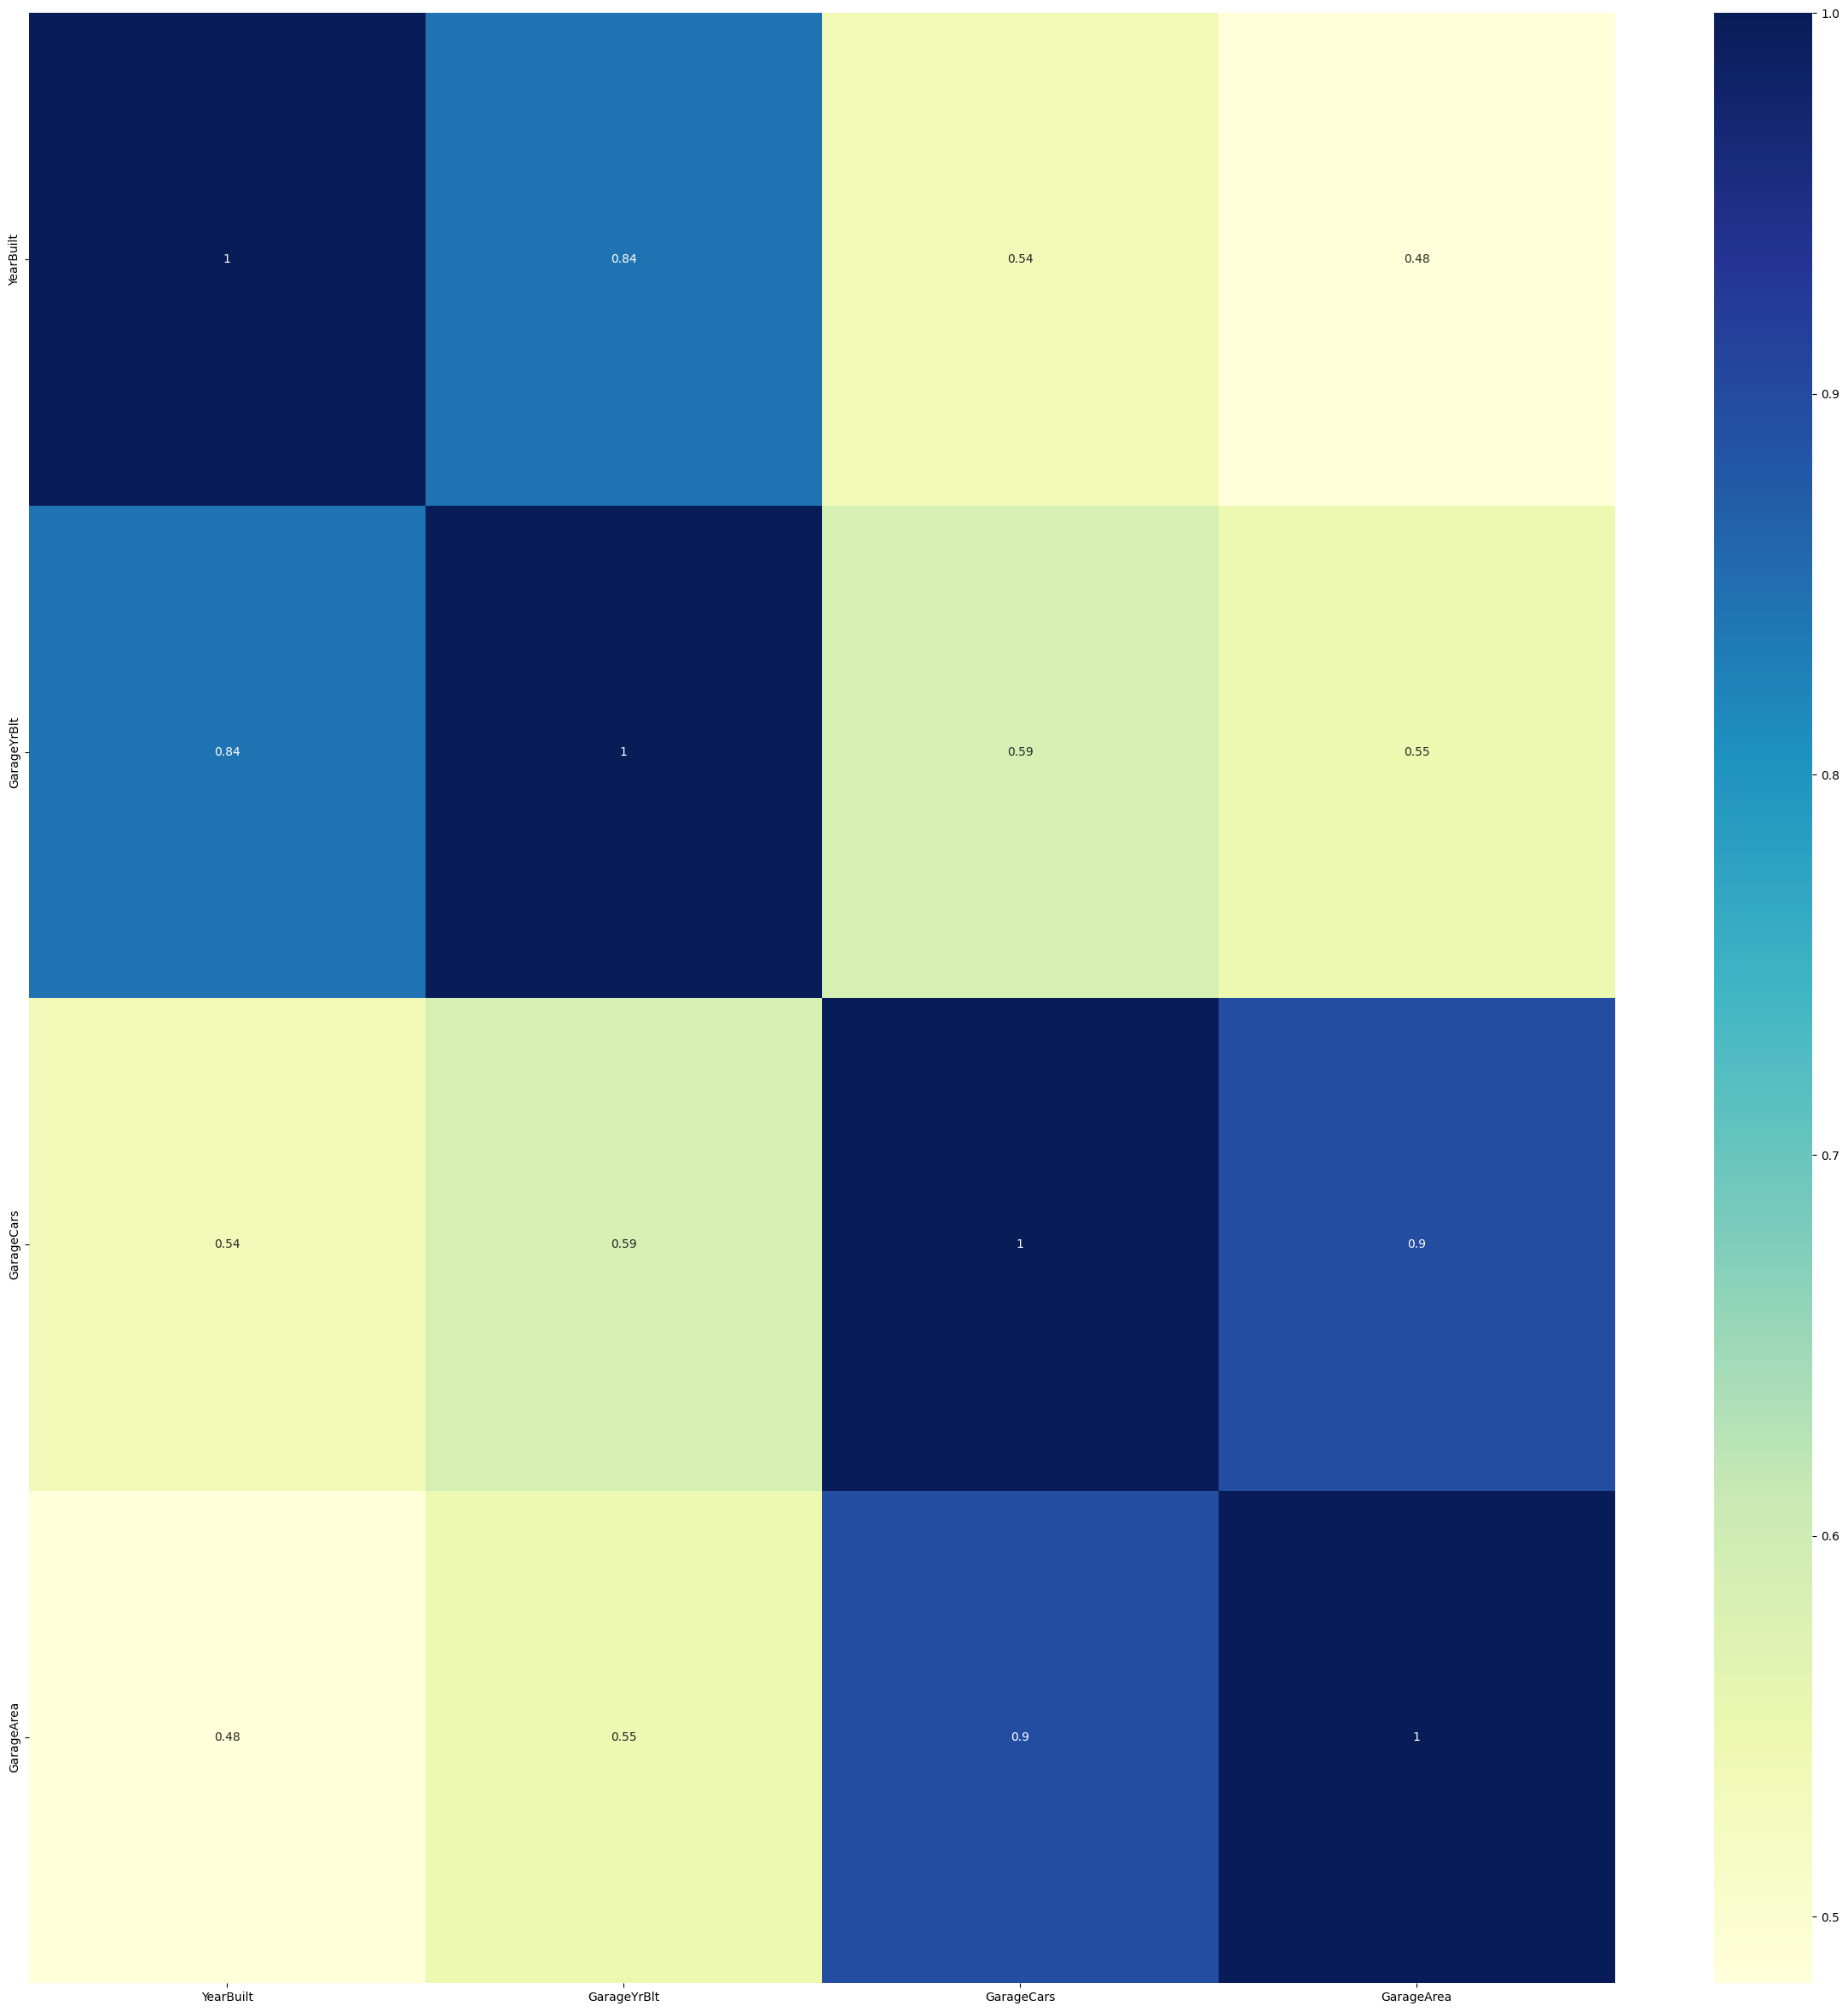

In [177]:
# plotting highly correlated features in heatmap
import seaborn as sb
plt.figure(figsize=(30, 30));
dataplot = sb.heatmap(test_data[l].corr(), cmap="YlGnBu", annot=True);

# displaying heatmap
plt.show();

In [178]:
# calculate variance if variance is less than 10 percent than eliminate the columns

df_var_test = test_data.var()
df_var_test = pd.DataFrame(df_var_test)

<ipython-input-178-bece62debd6b>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_var_test = test_data.var()


In [179]:
df_var_test['Index'] = df_var_test.index

In [180]:
df_var_test

0          Index
MSSubClass     1.827296e+03     MSSubClass
LotFrontage    5.007230e+02    LotFrontage
LotArea        2.455715e+07        LotArea
OverallQual    2.064428e+00    OverallQual
OverallCond    1.240416e+00    OverallCond
YearBuilt      9.235564e+02      YearBuilt
YearRemodAdd   4.464966e+02   YearRemodAdd
MasVnrArea     3.155096e+04     MasVnrArea
BsmtFinSF1     2.072690e+05     BsmtFinSF1
BsmtFinSF2     3.124195e+04     BsmtFinSF2
BsmtUnfSF      1.911967e+05      BsmtUnfSF
TotalBsmtSF    1.961592e+05    TotalBsmtSF
1stFlrSF       1.585360e+05       1stFlrSF
2ndFlrSF       1.769130e+05       2ndFlrSF
LowQualFinSF   1.939808e+03   LowQualFinSF
GrLivArea      2.357744e+05      GrLivArea
BsmtFullBath   2.815868e-01   BsmtFullBath
BsmtHalfBath   6.374022e-02   BsmtHalfBath
FullBath       3.082358e-01       FullBath
HalfBath       2.530258e-01       HalfBath
BedroomAbvGr   6.885487e-01   BedroomAbvGr
KitchenAbvGr   4.346044e-02   KitchenAbvGr
TotRmsAbvGrd   2.276763e+00   TotRmsAbvGrd
Fireplaces     4.191532e-01     Fireplaces
GarageYrBlt    6.986070e+02    GarageYrBlt
GarageCars     6.020908e-01     GarageCars
GarageArea     4.711010e+04     GarageArea
WoodDeckSF     1.631875e+04     WoodDeckSF
OpenPorchSF    4.744918e+03    OpenPorchSF
EnclosedPorch  4.519572e+03  EnclosedPorch
3SsnPorch      4.083569e+02      3SsnPorch
ScreenPorch    3.204665e+03    ScreenPorch
PoolArea       9.297405e+02       PoolArea
MiscVal        3.979174e+05        MiscVal
MoSold         7.411635e+00         MoSold
YrSold         1.694527e+00         YrSold

In [181]:
df_var_test.columns = ["Variance", "Index"]
df_var_test

Variance          Index
MSSubClass     1.827296e+03     MSSubClass
LotFrontage    5.007230e+02    LotFrontage
LotArea        2.455715e+07        LotArea
OverallQual    2.064428e+00    OverallQual
OverallCond    1.240416e+00    OverallCond
YearBuilt      9.235564e+02      YearBuilt
YearRemodAdd   4.464966e+02   YearRemodAdd
MasVnrArea     3.155096e+04     MasVnrArea
BsmtFinSF1     2.072690e+05     BsmtFinSF1
BsmtFinSF2     3.124195e+04     BsmtFinSF2
BsmtUnfSF      1.911967e+05      BsmtUnfSF
TotalBsmtSF    1.961592e+05    TotalBsmtSF
1stFlrSF       1.585360e+05       1stFlrSF
2ndFlrSF       1.769130e+05       2ndFlrSF
LowQualFinSF   1.939808e+03   LowQualFinSF
GrLivArea      2.357744e+05      GrLivArea
BsmtFullBath   2.815868e-01   BsmtFullBath
BsmtHalfBath   6.374022e-02   BsmtHalfBath
FullBath       3.082358e-01       FullBath
HalfBath       2.530258e-01       HalfBath
BedroomAbvGr   6.885487e-01   BedroomAbvGr
KitchenAbvGr   4.346044e-02   KitchenAbvGr
TotRmsAbvGrd   2.276763e+00   TotRmsAbvGrd
Fireplaces     4.191532e-01     Fireplaces
GarageYrBlt    6.986070e+02    GarageYrBlt
GarageCars     6.020908e-01     GarageCars
GarageArea     4.711010e+04     GarageArea
WoodDeckSF     1.631875e+04     WoodDeckSF
OpenPorchSF    4.744918e+03    OpenPorchSF
EnclosedPorch  4.519572e+03  EnclosedPorch
3SsnPorch      4.083569e+02      3SsnPorch
ScreenPorch    3.204665e+03    ScreenPorch
PoolArea       9.297405e+02       PoolArea
MiscVal        3.979174e+05        MiscVal
MoSold         7.411635e+00         MoSold
YrSold         1.694527e+00         YrSold

In [182]:
# identifying the column having less than 10 percent variance
df_var_test[df_var_test['Variance'] <= 0.10]

Variance         Index
BsmtHalfBath   0.06374  BsmtHalfBath
KitchenAbvGr   0.04346  KitchenAbvGr

In [183]:
test_data.shape

(1459, 74)

In [184]:
# after dropping these two columns
test_data.drop(["BsmtHalfBath","KitchenAbvGr"], axis = 1, inplace = True)
test_data.shape

(1459, 72)

In [185]:
df_col_test = test_data.select_dtypes(include = "object")
df_col_test.isna().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

In [186]:
df_col_test = obj_func(df_col_test)

In [187]:
# after filling the values with mode
df_col_test.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [188]:
# dropping the categorical column from the dataframe
test_data.drop(columns = df_col_test.columns , axis = 1 , inplace = True)

In [189]:
df_col_test.shape

(1459, 38)

In [190]:
# converting the categorical column into one hot encoding
df_col_test = pd.get_dummies(df_col_test, columns=df_col_test.columns)
df_col_test.shape

(1459, 218)

In [191]:
test_data_final = pd.concat([test_data, df_col_test], axis=1)
test_data_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1961         0.0       468.0       144.0      270.0        882.0   
1          1958       108.0       923.0         0.0      406.0       1329.0   
2          1998         0.0       791.0         0.0      137.0        928.0   
3          1998        20.0       602.0         0.0      324.0        926.0   
4          1992         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0       896         0             0        896           0.0         1   
1      1329         0             0       1329           0.0         1   
2       928       701             0       1629           0.0         2   
3       926       678             0       1604           0.0         2   
4      1280         0             0       1280           0.0         2   

   HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0         0             2             5           0       1961.0         1.0   
1         1             3             6           0       1958.0         1.0   
2         1             3             6           1       1997.0         2.0   
3         1             3             7           1       1998.0         2.0   
4         0             2             5           0       1992.0         2.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       730.0         140            0              0          0          120   
1       312.0         393           36              0          0            0   
2       482.0         212           34              0          0            0   
3       470.0         360           36              0          0            0   
4       506.0           0           82              0          0          144   

   PoolArea  MiscVal  MoSold  YrSold  MSZoning_C (all)  MSZoning_FV  \
0         0        0       6    2010                 0            0   
1         0    12500       6    2010                 0            0   
2         0        0       3    2010                 0            0   
3         0        0       6    2010                 0            0   
4         0        0       1    2010                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            1            0            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0            0            1   
4            0            1            0            0            1   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             1             0             0             0                0   
2             1             0             0             0                0   
3             1             0             0             0                0   
4             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_AllPub  \
0                0                0                1                 1   
1                0                0                1                 1   
2                0                0                1                 1   
3                0                0          

In [192]:
test_data_final.shape

(1459, 252)

In [193]:
test_data_final.isna().sum()

MSSubClass                 0
LotFrontage              227
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                15
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               2
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               78
GarageCars                 1
GarageArea                 1
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MoSold                     0
YrSold                     0
MSZoning_C (al

In [194]:
# test_data_final = median_func(test_data_final)

In [195]:
# test_data_final.isna().sum()

In [196]:
df_num_test = test_data_final.select_dtypes(include = ['int64','float64'])
num_numerical_col_test = df_num_test.columns.tolist()

In [197]:
# before detecting the outliers
test_data_final.isna().sum()

MSSubClass                 0
LotFrontage              227
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                15
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               2
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt               78
GarageCars                 1
GarageArea                 1
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
3SsnPorch                  0
ScreenPorch                0
PoolArea                   0
MiscVal                    0
MoSold                     0
YrSold                     0
MSZoning_C (al

In [198]:
# detecting outliers from the test_data_final data frame
for ele in num_numerical_col_test:
    q75,q25 = np.percentile(test_data_final.loc[:,ele],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    test_data_final.loc[test_data_final[ele] < min,ele] = np.nan
    test_data_final.loc[test_data_final[ele] > max,ele] = np.nan

In [199]:
# after detecting the outliers
test_data_final.isna().sum()

MSSubClass               104
LotFrontage              227
LotArea                   60
OverallQual                2
OverallCond              127
YearBuilt                  2
YearRemodAdd               0
MasVnrArea                15
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                  23
2ndFlrSF                   5
LowQualFinSF              14
GrLivArea                 44
BsmtFullBath               2
FullBath                   4
HalfBath                   0
BedroomAbvGr              43
TotRmsAbvGrd              21
Fireplaces                 7
GarageYrBlt               78
GarageCars                 1
GarageArea                 1
WoodDeckSF                35
OpenPorchSF               79
EnclosedPorch            251
3SsnPorch                 13
ScreenPorch              140
PoolArea                   6
MiscVal                   51
MoSold                     0
YrSold                     0
MSZoning_C (al

In [200]:
# after filling the values with mean in the outliers
test_data_final = mean_func(test_data_final)
test_data_final.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
M

In [201]:
test_data_final.shape

(1459, 252)

In [202]:
df_final.shape

(1460, 269)

In [203]:
test_data_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        20.0         80.0  11622.0          5.0          6.0     1961.0   
1        20.0         81.0  14267.0          6.0          6.0     1958.0   
2        60.0         74.0  13830.0          5.0          5.0     1997.0   
3        60.0         78.0   9978.0          6.0          6.0     1998.0   
4       120.0         43.0   5005.0          8.0          5.0     1992.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        1961.0         0.0       468.0       144.0      270.0        882.0   
1        1958.0       108.0       923.0         0.0      406.0       1329.0   
2        1998.0         0.0       791.0         0.0      137.0        928.0   
3        1998.0        20.0       602.0         0.0      324.0        926.0   
4        1992.0         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0     896.0       0.0           0.0      896.0           0.0       1.0   
1    1329.0       0.0           0.0     1329.0           0.0       1.0   
2     928.0     701.0           0.0     1629.0           0.0       2.0   
3     926.0     678.0           0.0     1604.0           0.0       2.0   
4    1280.0       0.0           0.0     1280.0           0.0       2.0   

   HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0       0.0           2.0           5.0         0.0       1961.0         1.0   
1       1.0           3.0           6.0         0.0       1958.0         1.0   
2       1.0           3.0           6.0         1.0       1997.0         2.0   
3       1.0           3.0           7.0         1.0       1998.0         2.0   
4       0.0           2.0           5.0         0.0       1992.0         2.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       730.0       140.0          0.0            0.0        0.0          0.0   
1       312.0       393.0         36.0            0.0        0.0          0.0   
2       482.0       212.0         34.0            0.0        0.0          0.0   
3       470.0       360.0         36.0            0.0        0.0          0.0   
4       506.0         0.0         82.0            0.0        0.0          0.0   

   PoolArea  MiscVal  MoSold  YrSold  MSZoning_C (all)  MSZoning_FV  \
0       0.0      0.0     6.0  2010.0                 0            0   
1       0.0      0.0     6.0  2010.0                 0            0   
2       0.0      0.0     3.0  2010.0                 0            0   
3       0.0      0.0     6.0  2010.0                 0            0   
4       0.0      0.0     1.0  2010.0                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            1            0            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0            0            1   
4            0            1            0            0            1   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             1             0             0             0                0   
2             1             0             0             0                0   
3             1             0             0             0                0   
4             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_AllPub  \
0                0                0                1                 1   
1                0                0                1                 1   
2                0                0                1                 1   
3                0                0          

In [204]:
# Get missing columns in the training test
missing_cols = set( df_final.columns ) - set( test_data_final.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_data_final[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_data_final = test_data_final[df_final.columns]

In [205]:
df_final.shape

(1460, 269)

In [206]:
test_data_final.shape

(1459, 269)

In [207]:
test_data_final.drop(columns = 'SalePrice', axis = 1, inplace = True)

In [208]:
test_data_final.shape

(1459, 268)

In [209]:
test_data_final.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        20.0         80.0  11622.0          5.0          6.0     1961.0   
1        20.0         81.0  14267.0          6.0          6.0     1958.0   
2        60.0         74.0  13830.0          5.0          5.0     1997.0   
3        60.0         78.0   9978.0          6.0          6.0     1998.0   
4       120.0         43.0   5005.0          8.0          5.0     1992.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        1961.0         0.0       468.0       144.0      270.0        882.0   
1        1958.0       108.0       923.0         0.0      406.0       1329.0   
2        1998.0         0.0       791.0         0.0      137.0        928.0   
3        1998.0        20.0       602.0         0.0      324.0        926.0   
4        1992.0         0.0       263.0         0.0     1017.0       1280.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0     896.0       0.0           0.0      896.0           0.0       1.0   
1    1329.0       0.0           0.0     1329.0           0.0       1.0   
2     928.0     701.0           0.0     1629.0           0.0       2.0   
3     926.0     678.0           0.0     1604.0           0.0       2.0   
4    1280.0       0.0           0.0     1280.0           0.0       2.0   

   HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0       0.0           2.0           5.0         0.0       1961.0         1.0   
1       1.0           3.0           6.0         0.0       1958.0         1.0   
2       1.0           3.0           6.0         1.0       1997.0         2.0   
3       1.0           3.0           7.0         1.0       1998.0         2.0   
4       0.0           2.0           5.0         0.0       1992.0         2.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       730.0       140.0          0.0            0.0        0.0          0.0   
1       312.0       393.0         36.0            0.0        0.0          0.0   
2       482.0       212.0         34.0            0.0        0.0          0.0   
3       470.0       360.0         36.0            0.0        0.0          0.0   
4       506.0         0.0         82.0            0.0        0.0          0.0   

   PoolArea  MiscVal  MoSold  YrSold  MSZoning_C (all)  MSZoning_FV  \
0       0.0      0.0     6.0  2010.0                 0            0   
1       0.0      0.0     6.0  2010.0                 0            0   
2       0.0      0.0     3.0  2010.0                 0            0   
3       0.0      0.0     6.0  2010.0                 0            0   
4       0.0      0.0     1.0  2010.0                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0            1            0            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            1            0            0            1   
4            0            1            0            0            1   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             1             0             0             0                0   
2             1             0             0             0                0   
3             1             0             0             0                0   
4             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_AllPub  \
0                0                0                1                 1   
1                0                0                1                 1   
2                0                0                1                 1   
3                0                0          

# Applying PCA in test data

In [213]:
pca = PCA(n_components = 10)
test_data_final = pca.fit_transform(test_data_final)

In [214]:
# predicting the test data
y_test = model.predict(test_data_final)

In [ ]:
# my_submission = pd.DataFrame({'Id': range(len(y_test)), 'SalePrice': y_test})
# # you could use any filename. We choose submission here
# my_submission.to_csv('submission.csv', index=False)

In [215]:
pred = pd.DataFrame(y_test)
sub_df = pd.read_csv(path + 'test.csv')
datasets = pd.concat([sub_df["Id"], pred], axis = 1)
datasets.columns = ["Id", "SalePrice"]
datasets.to_csv('tcs_submission.csv', index=False)